ALUNO: PEDRO NÍCOLLAS PEREIRA LEON LOPES

### 1 - Classificação com Regressão Logística

Implemente um modelo de Regressão Logística para classificar o conjunto de dados Iris (ou qualquer outro).

Avalie o modelo utilizando a métrica de acurácia e a matriz de confusão.

Existem 3 tipos de regressão logística:

- 1 - <b>Regressão Logística Binária:</b> Utilizada quando a variável dependente é de natureza binária, tendo como resultado apenas dois valores possíveis

        Exemplo: Classificação de SPAM (Sim/Não) ; Classificação de Diabetes (Sim/Não).

- 2 - <b>Regressão Logística Ordinal:</b> Utilizada quando a variável dependente é ordinal, ou seja, logicamente ordenada.

        Exemplo: Classificação de Satisfação de Clientes

- 3 - <b>Regressão Logística Multinomial:</b> Utilizada quando a variável dependente é nominal e possui mais de dois níveis.

        Exemplo: Classificação e previsão de tipos de vinho.


In [135]:
# DATASET UTILIZADO -> IRIS (data/iris.csv)

In [136]:
# Conjunto de Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay            # Import do sklearn para accuracy e confusion_matriz

In [137]:
dados = pd.read_csv("data/iris.csv")            # lendo o .csv

In [138]:
dados.head()            # vendo o cabeçalho do .csv

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [139]:
colunas = dados.columns         # atribuição das colunas a uma variável

Normalizando os dados

In [140]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [141]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [142]:
# Normalização dos valores para entre -1 e 1

colunas_para_normalizar = ['sepal_length', 'petal_length', 'petal_width']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
# Transformação de "species" de STR para INT (LabelEncoder)
encoder = LabelEncoder()                                            # usando LabelEncoder()
dados['species'] = encoder.fit_transform(dados['species'])          # transformação de str pra int
dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,3.5,0.067797,0.041667,0
1,0.166667,3.0,0.067797,0.041667,0
2,0.111111,3.2,0.050847,0.041667,0
3,0.083333,3.1,0.084746,0.041667,0
4,0.194444,3.6,0.067797,0.041667,0


Separando em amostra de treino e teste

In [145]:
# Colunas de treinamento
X = np.array(dados[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Colunas de 
Y = np.array(dados['species'])

Separando em amostra de treino e teste

In [146]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [147]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino
print("{0:0.2f}% para treino".format((len(X_treino)/len(dados.index)) * 100))
print("{0:0.2f}% para validação".format((len(X_teste)/len(dados.index)) * 100))

70.00% para treino
30.00% para validação


In [148]:
from sklearn.linear_model import LogisticRegression             # import da Regressão Logística

In [149]:
modelo_LogReg = LogisticRegression()           # Regressão Logísitca

In [150]:
modelo_LogReg.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

LogisticRegression()

In [151]:
Y_previsto = modelo_LogReg.predict(X_teste)           # realização de previsões com a amostra de teste

# CRIANDO MATRIZ DE CONFUSÃO

In [152]:
confusion_matrix_LogReg = confusion_matrix(Y_teste,Y_previsto)            # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

MODEL CONFUSION MATRIX:
[[16  0  0]
 [ 0 15  3]
 [ 0  1 10]]


<Axes: >

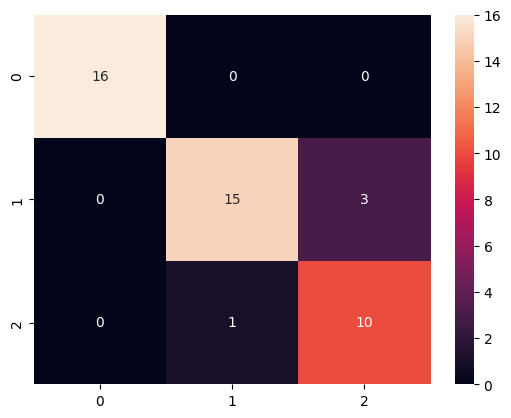

In [153]:
# CONFUSION MATRIX PRINTADA:
conf_matrix = confusion_matrix(Y_teste, Y_previsto)
print("MODEL CONFUSION MATRIX:")
print(conf_matrix)

# CONFUSION MATRIX FOTO
sns.heatmap(confusion_matrix_LogReg,annot=True, fmt="d")            # criação do heatmap

# ACURÁCIA DO MODELO


In [154]:
print("Acurácia do Modelo:")
print(accuracy_score(Y_teste, Y_previsto))          # 91%

Acurácia do Modelo:
0.9111111111111111
